In [6]:
# Download dataset using gdown

import gdown

bdd100k_url = "https://drive.google.com/file/d/1b_WgEsT5uBwF6AypEbDsrBpKyWQu9m8p"
lol_url = "https://drive.google.com/file/d/1yp0T3Zjk8p7UKm4Z8XqKhYRnsSgFcppw"
lol_synthetic_url = "https://drive.google.com/file/d/1eMj-eqe2JAh5lW5iucAO20YszlqfHNU0"

gdown.download(bdd100k_url, output="bdd100k-forkgan.zip", quiet=False)
# gdown.download(lol_url, output='lol.zip', quiet=False)
# gdown.download(lol_synthetic_url, output='lol_synthetic.zip', quiet=False)

Downloading...
From: https://drive.google.com/file/d/1b_WgEsT5uBwF6AypEbDsrBpKyWQu9m8p
To: /home/tharusha/ForkGAN-pytorch/bdd100k.zip
82.6kB [00:00, 8.87MB/s]


'bdd100k.zip'

In [11]:
# unzip files to ./datasets folder
import zipfile

# with zipfile.ZipFile("bdd100k-forkgan.zip", "r") as zip_ref:
#     zip_ref.extractall("datasets")

with zipfile.ZipFile("lol-forkgan.zip", "r") as zip_ref:
    zip_ref.extractall("./datasets")

# with zipfile.ZipFile('lol_synthetic.zip', 'r') as zip_ref:
#     zip_ref.extractall('datasets')

In [2]:
# print the folder structure of ./datasets folder
import os
import sys


def print_folder_structure(folder, indent=0):
    for item in os.listdir(folder):
        if item.startswith("."):
            continue
        path = os.path.join(folder, item)
        if os.path.isdir(path):
            print(" " * indent + item + "/")
            print_folder_structure(path, indent + 2)
        else:
            # print(' ' * indent + item)
            pass


if __name__ == "__main__":
    print_folder_structure("./datasets")

augmented_lol/
  trainA/
  trainB/
super_augmented/
  trainA/
  trainB/
merged_ds/
  testA/
  trainA/
  testB/
  trainB/
bdd100k/
  testA/
  trainA/
  testB/
  trainB/
lol/
  testA/
  trainA/
  testB/
  trainB/
augmented_bdd100k/
  trainA/
  trainB/


In [18]:
import os
import random
from PIL import Image, ImageEnhance
from tqdm import tqdm


def augment_dataset(
    input_folder,
    output_folder,
    num_augmentations=3,
    rotation_range=(0, 360),
    scale_range=(0.8, 1.2),
    crop_size=(256, 256),
):
    """
    Augment dataset by rotations, scaling, cropping, and color jittering.

    Parameters:
        input_folder (str): Path to the input folder containing images.
        output_folder (str): Path to the output folder to save augmented images.
        num_augmentations (int): Number of augmented images to generate for each input image.
        rotation_range (tuple): Range of rotation angles in degrees.
        scale_range (tuple): Range of scaling factors.
        crop_size (tuple): Size of the cropped region (height, width).
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all images in the input folder
    image_files = [f for f in os.listdir(input_folder)]

    for image_file in tqdm(image_files, desc="Augmenting dataset"):
        # Open image
        image_path = os.path.join(input_folder, image_file)
        with Image.open(image_path) as img:
            # Apply augmentations
            count = 0
            for i in range(num_augmentations):
                augmented_img = img.copy()

                # Rotation
                rotation_angle = random.choice([0, 90, 180, 270])
                if count == 0:
                    rotation_angle = 90
                    count = 1
                elif count == 1:
                    rotation_angle = 180
                    count = 2
                elif count == 2:
                    rotation_angle = 270
                    count = 3
                else:
                    rotation_angle = random.choice([0, 90, 180, 270])
                augmented_img = augmented_img.rotate(rotation_angle)

                # Scaling
                scale_factor = random.uniform(scale_range[0], scale_range[1])
                new_size = (
                    int(augmented_img.width * scale_factor),
                    int(augmented_img.height * scale_factor),
                )
                augmented_img = augmented_img.resize(new_size, Image.ANTIALIAS)

                # Save augmented image
                augmented_filename = os.path.splitext(image_file)[0] + f"_aug_{i}.jpg"
                augmented_filepath = os.path.join(output_folder, augmented_filename)
                augmented_img.save(augmented_filepath)

    print("Dataset augmentation completed.")

In [19]:
# Example usage:
augment_dataset("./datasets/bdd100k/trainA", "./datasets/augmented_bdd100k/trainA")
augment_dataset("./datasets/bdd100k/trainB", "./datasets/augmented_bdd100k/trainB")

Augmenting dataset:   0%|          | 0/27971 [00:00<?, ?it/s]/var/tmp/ipykernel_1474191/3854761842.py:63: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  augmented_img = augmented_img.resize(new_size, Image.ANTIALIAS)
Augmenting dataset:   0%|          | 1/27971 [00:00<1:26:19,  5.40it/s]

Augmenting dataset: 100%|██████████| 27971/27971 [1:15:01<00:00,  6.21it/s]


Dataset augmentation completed.


Augmenting dataset: 100%|██████████| 36728/36728 [1:46:50<00:00,  5.73it/s]

Dataset augmentation completed.


In [4]:
# get total number of images in each folder
def get_num_images(folder):
    return len([f for f in os.listdir(folder) if f.endswith(".jpg")])


num_images_bdd100k_trainA = get_num_images("./datasets/augmented_bdd100k/trainA")
num_images_bdd100k_trainB = get_num_images("./datasets/augmented_bdd100k/trainB")

print(f"Total number of images in BDD100K trainA: {num_images_bdd100k_trainA}")
print(f"Total number of images in BDD100K trainB: {num_images_bdd100k_trainB}")

num_images_lol_trainA = get_num_images("./datasets/augmented_lol/trainA")
num_images_lol_trainB = get_num_images("./datasets/augmented_lol/trainB")

print(f"Total number of images in lol trainA: {num_images_lol_trainA}")
print(f"Total number of images in lol trainB: {num_images_lol_trainB}")

Total number of images in BDD100K trainA: 83913
Total number of images in BDD100K trainB: 110184
Total number of images in lol trainA: 3445
Total number of images in lol trainB: 3445


In [5]:
num_images_lol_trainA = get_num_images("./datasets/merged_ds/trainA")
num_images_lol_trainB = get_num_images("./datasets/merged_ds/trainB")

print(f"Total number of images in merged_ds trainA: {num_images_lol_trainA}")
print(f"Total number of images in merged_ds trainB: {num_images_lol_trainB}")

Total number of images in merged_ds trainA: 111884
Total number of images in merged_ds trainB: 146912


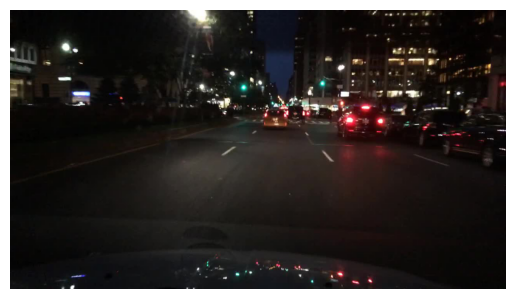

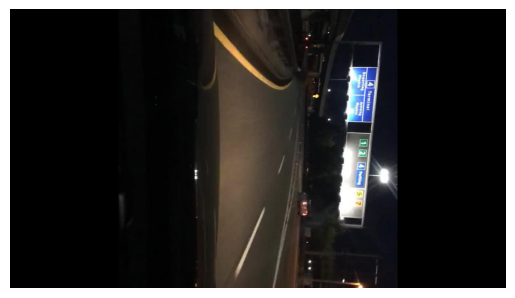

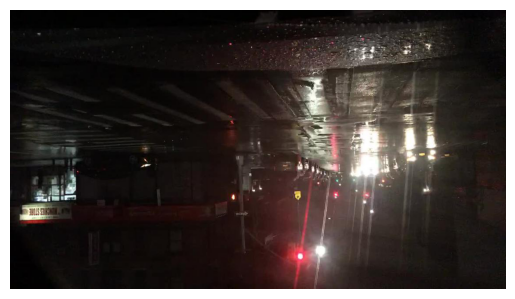

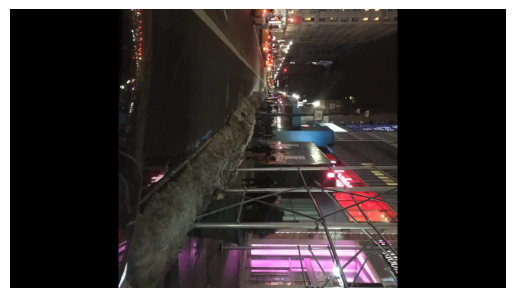

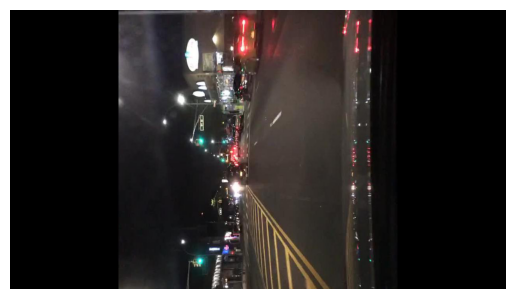

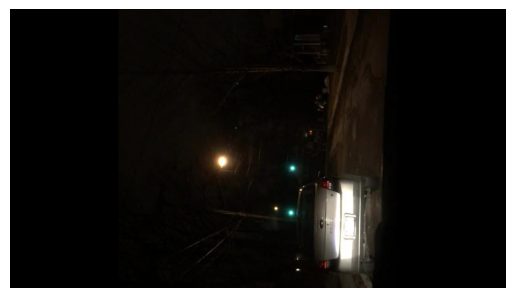

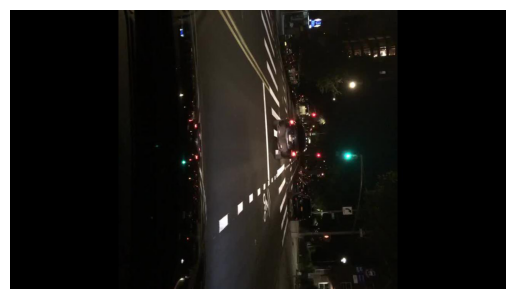

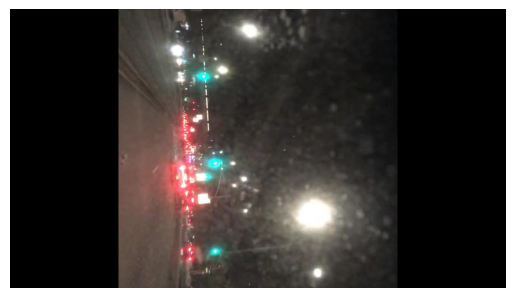

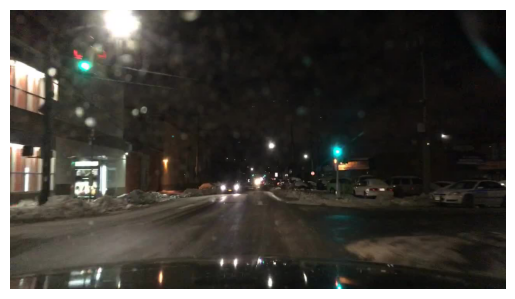

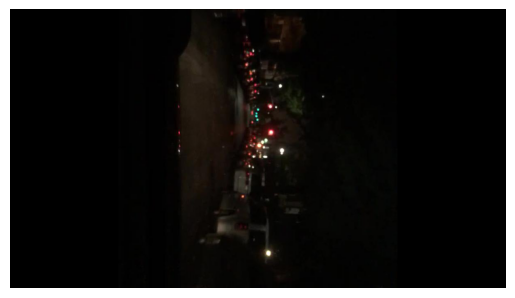

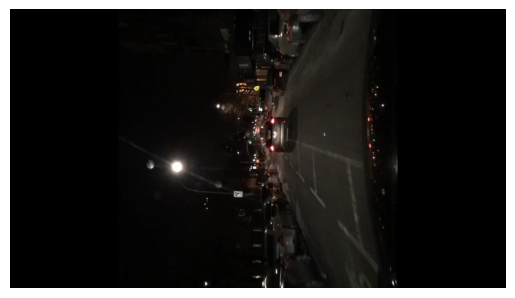

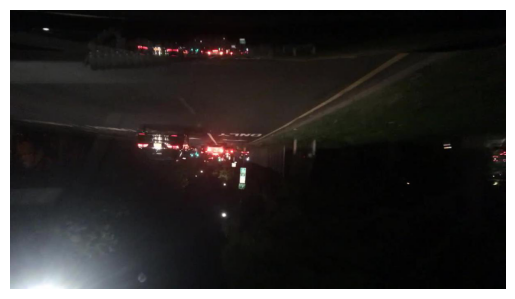

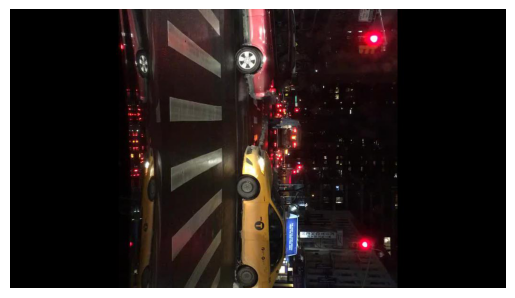

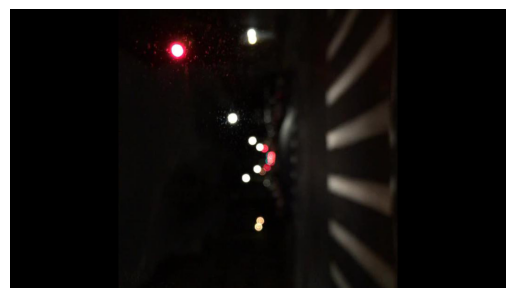

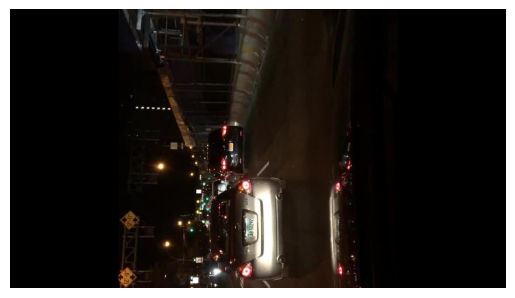

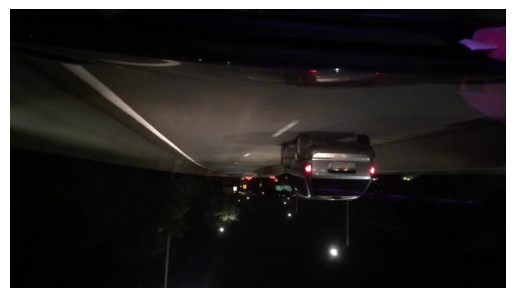

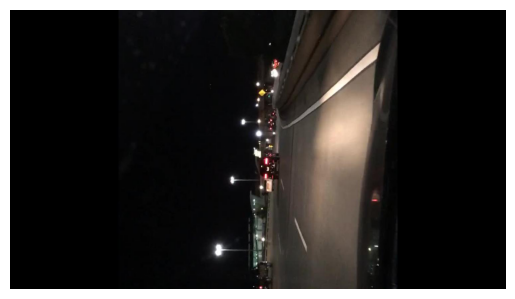

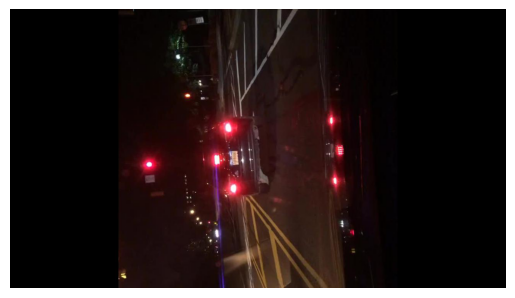

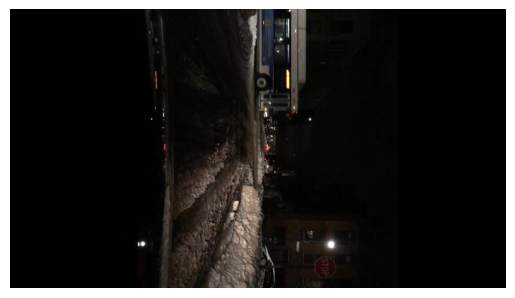

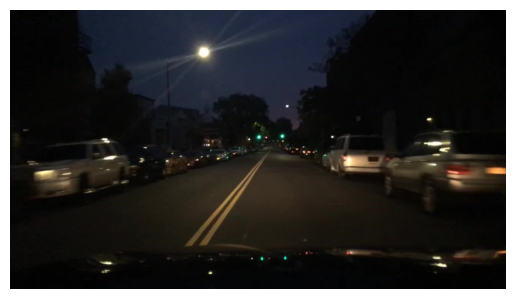

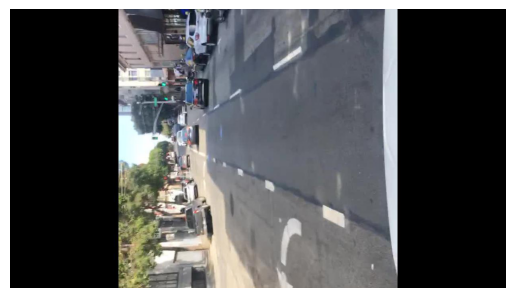

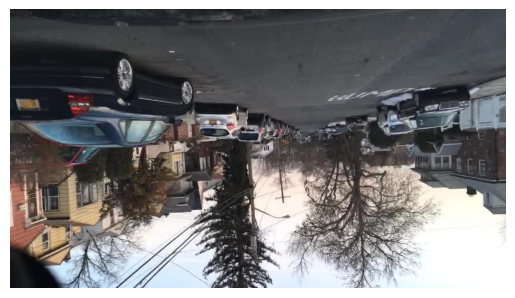

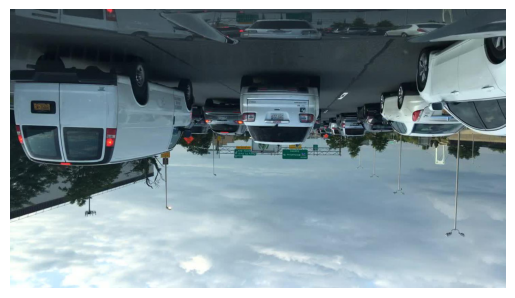

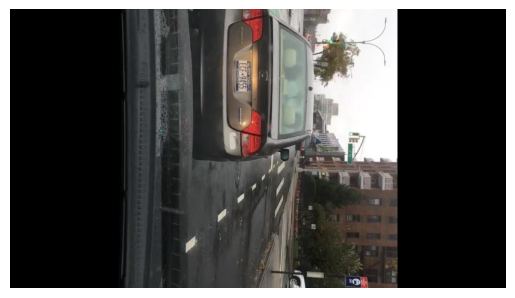

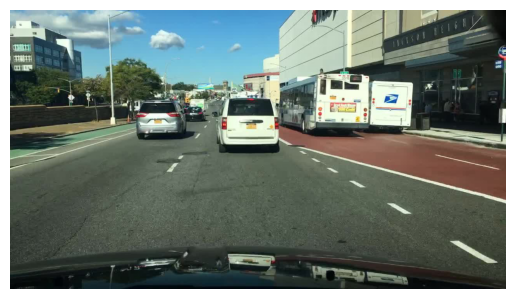

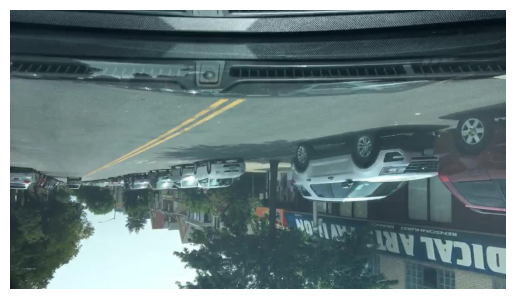

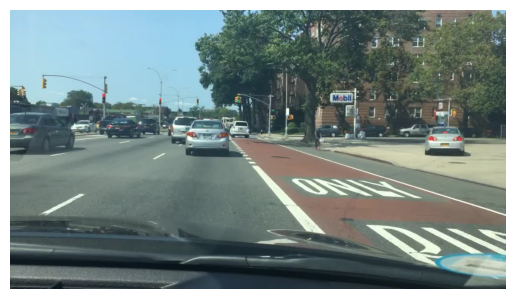

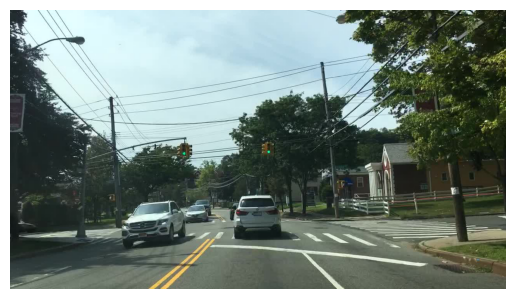

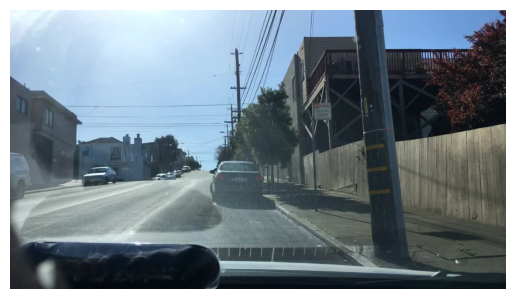

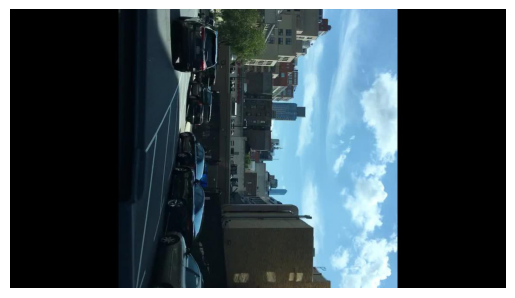

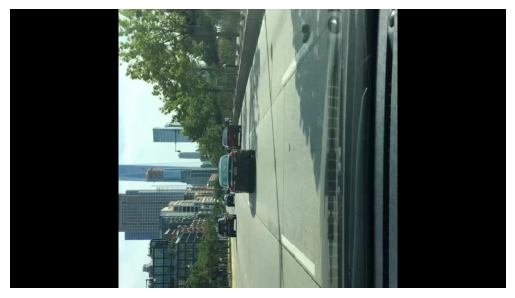

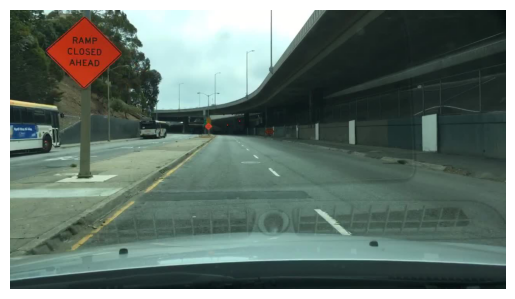

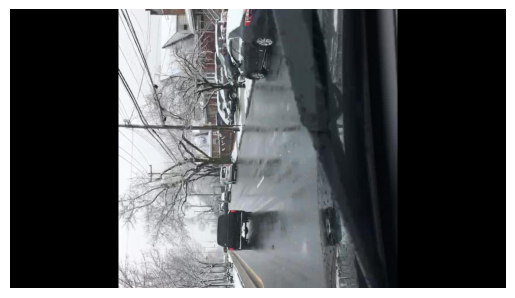

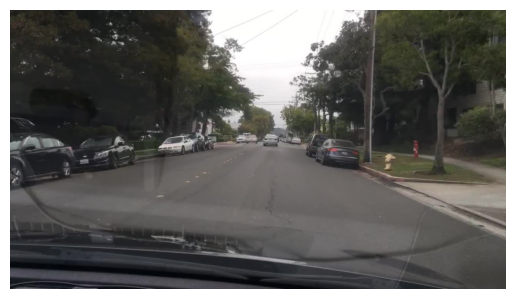

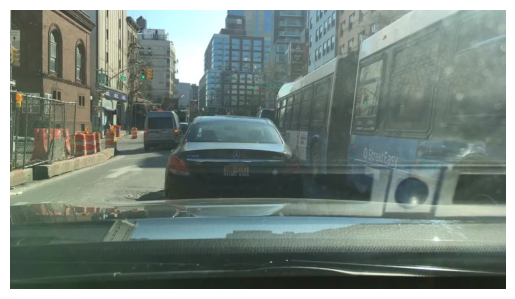

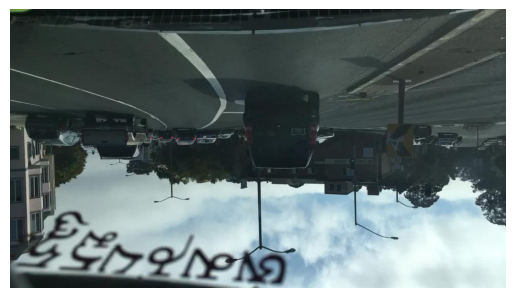

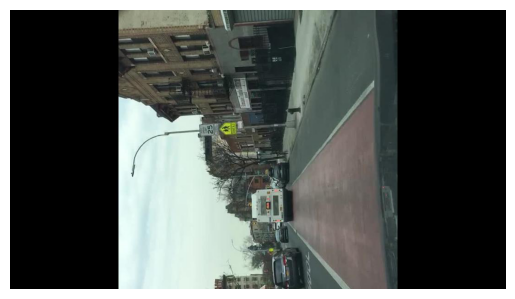

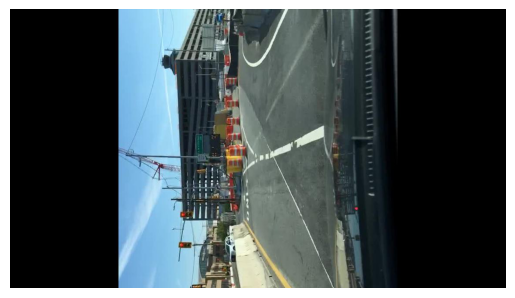

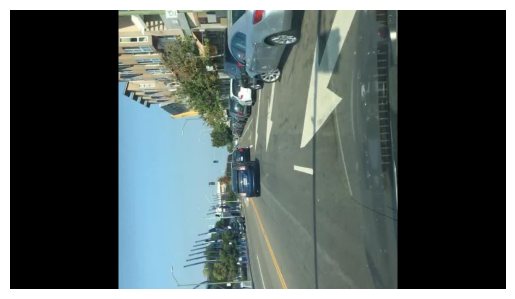

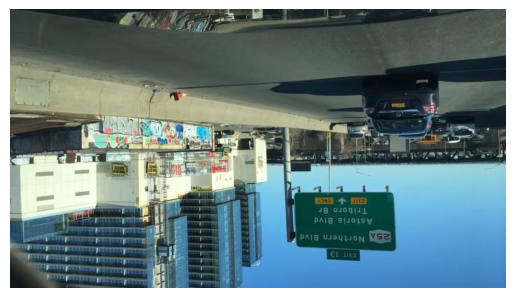

In [3]:
# preview some images in merged_ds/trainA and merged_ds/trainB
import matplotlib.pyplot as plt
import os
from PIL import Image


def preview_images(folder, num_images=20):
    image_files = [f for f in os.listdir(folder) if f.endswith(".jpg")]
    for i in range(num_images):
        image_path = os.path.join(folder, image_files[i])
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis("off")
        plt.show()


preview_images("./datasets/merged_ds/trainA")
preview_images("./datasets/merged_ds/trainB")